**Assignment: Word Embeddings and Similarity Measures**
# **Task 1**

In [2]:
import numpy as np

from gensim.models import Word2Vec

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

from scipy.spatial.distance import jaccard
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aa245\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aa245\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
#Sample Documents
documents = [
	"This is the first sentence",
	"This is also the first sentence",
	"this is also kind of the first sentence but different.",
	"a completely different kind of sentence right?"
]

#tokenization of the documents
tokenized_documents = [word_tokenize(doc) for doc in documents]
print(tokenized_documents)

[['This', 'is', 'the', 'first', 'sentence'], ['This', 'is', 'also', 'the', 'first', 'sentence'], ['this', 'is', 'also', 'kind', 'of', 'the', 'first', 'sentence', 'but', 'different', '.'], ['a', 'completely', 'different', 'kind', 'of', 'sentence', 'right', '?']]


In [4]:
#Training word2vec
model = Word2Vec(sentences=tokenized_documents, vector_size=2, window=2, min_count=1, sg=0)
test_vector = model.wv['sentence']
print("Word Embedding for 'sentence':", test_vector)
#word embeddings
word_emb = model.wv

Word Embedding for 'sentence': [-0.02683848  0.011861  ]


In [5]:
#Printing all word embeddings
print("Word Embeddings:")
for word in word_emb.index_to_key:  # This gives you the list of words
    embedding = word_emb[word]  # Get the embedding for each word
    print(f"{word}: {embedding}")

Word Embeddings:
sentence: [-0.02683848  0.011861  ]
first: [0.25511152 0.45043436]
the: [-0.4651475  -0.35584044]
is: [0.32291776 0.4486719 ]
different: [-0.2507714  -0.18816859]
of: [ 0.3690475  -0.07662605]
kind: [-0.2267984   0.32769713]
also: [-0.24298443 -0.09073342]
This: [0.14382899 0.04959369]
?: [-0.41423175 -0.47247842]
right: [0.36559156 0.25354517]
completely: [0.33788466 0.03814328]
a: [ 0.31754452 -0.1702683 ]
.: [-0.04732007  0.28842866]
but: [-0.37608188 -0.19680518]
this: [-0.37565944 -0.04653949]


# **Task 2**

In [6]:
#calculates an average embedding to represent all words in a document
def get_document_embedding(model, document):
    embeddings = [model.wv[word] for word in document if word in model.wv]
    return np.mean(embeddings, axis=0)

In [7]:
#Calculating similarities between two documents
doc1_embedding = get_document_embedding(model, tokenized_documents[0])
doc2_embedding = get_document_embedding(model, tokenized_documents[1])
doc1_embedding

array([0.04597446, 0.1209441 ], dtype=float32)

In [9]:
# Cosine Similarity
cos_sim = cosine_similarity([doc1_embedding], [doc2_embedding])[0][0]
print("Cosine Similarity between Document 1 and Document 2:", cos_sim)

# Euclidean Distance
euclid_dist = euclidean(doc1_embedding, doc2_embedding)
print("Euclidean Distance between Document 1 and Document 2:", euclid_dist)

# Jaccard Similarity (based on token overlap, not embeddings)
doc1_set = set(tokenized_documents[0])
doc2_set = set(tokenized_documents[1])
jaccard_sim = len(doc1_set.intersection(doc2_set)) / len(doc1_set.union(doc2_set))
print("Jaccard Similarity between Document 1 and Document 2:", jaccard_sim)

Cosine Similarity between Document 1 and Document 2: 0.92537767
Euclidean Distance between Document 1 and Document 2: 0.05969938635826111
Jaccard Similarity between Document 1 and Document 2: 0.8333333333333334


**Analyzing the results obtained from different similarity measures:**
as i have tested with different documents , here is what i have noticed:

***Euclidean distance:*** a useful measure when you want to see how similar two documents are without being affected by the document length

***Cosine similarity:*** just like Euclidean distance but it's affected by the length of the documents

***Jaccard similarity:*** it's useful when you want to know how much the words are repeated between the documents (intersection).
Note: since i'm using an average embedding to represent a document i can't calculate jaccard from that so instead I directly calculated it from the overlap of words in tokenized_documents

This will be even more obvious when we visualize these similarities!

# **Bonus : Visualization**

In [26]:
# Compute embeddings for all documents
document_embeddings = [get_document_embedding(model, doc) for doc in tokenized_documents]


num_docs = len(documents)

#now we will create distance matrices for all similarity measures

# Cosine similarity matrix
cosine_sim_matrix = cosine_similarity(document_embeddings)

# Euclidean distance matrix
euclidean_dist_matrix = np.zeros((num_docs, num_docs))
for i in range(num_docs):
    for j in range(num_docs):
        euclidean_dist_matrix[i, j] = euclidean(document_embeddings[i], document_embeddings[j])

# Jaccard similarity matrix (based on token overlap)
jaccard_sim_matrix = np.zeros((num_docs, num_docs))
for i in range(num_docs):
    for j in range(num_docs):
        doc1_set = set(tokenized_documents[i])
        doc2_set = set(tokenized_documents[j])
        jaccard_sim_matrix[i, j] = len(doc1_set.intersection(doc2_set)) / len(doc1_set.union(doc2_set))

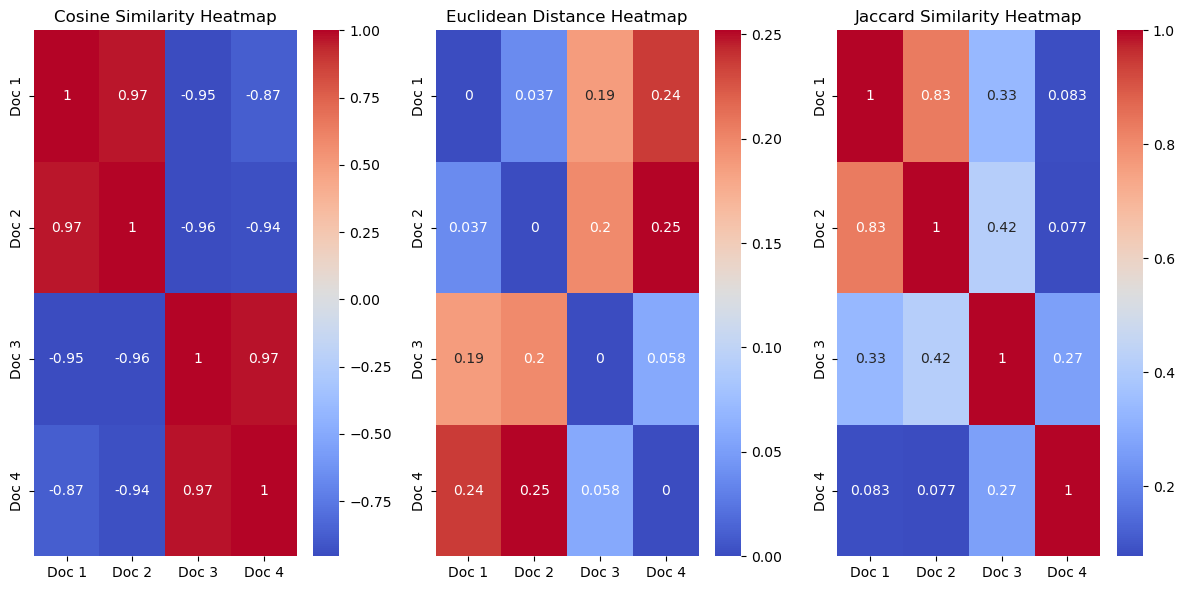

In [27]:
# Heatmap Visualization
plt.figure(figsize=(12, 6))

# Cosine Similarity Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(cosine_sim_matrix, annot=True, cmap="coolwarm", xticklabels=[f"Doc {i+1}" for i in range(num_docs)], yticklabels=[f"Doc {i+1}" for i in range(num_docs)])
plt.title("Cosine Similarity Heatmap")

# Euclidean Distance Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(euclidean_dist_matrix, annot=True, cmap="coolwarm", xticklabels=[f"Doc {i+1}" for i in range(num_docs)], yticklabels=[f"Doc {i+1}" for i in range(num_docs)])
plt.title("Euclidean Distance Heatmap")

# Jaccard Similarity Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(jaccard_sim_matrix, annot=True, cmap="coolwarm", xticklabels=[f"Doc {i+1}" for i in range(num_docs)], yticklabels=[f"Doc {i+1}" for i in range(num_docs)])
plt.title("Jaccard Similarity Heatmap")

plt.tight_layout()
plt.show()

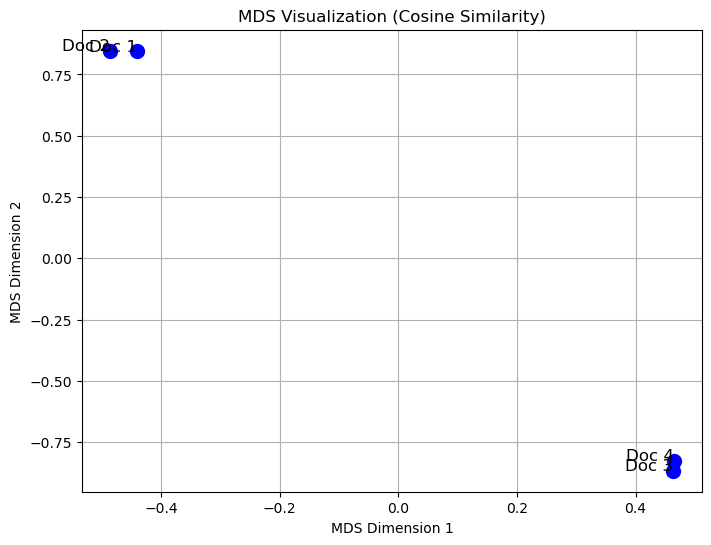

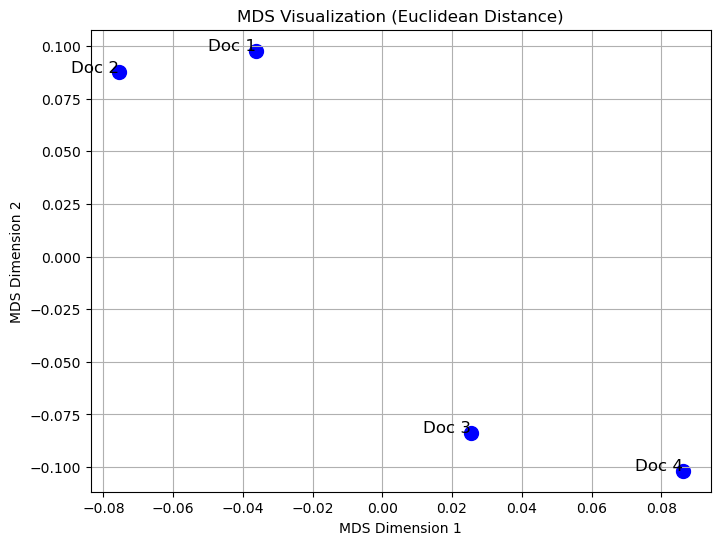

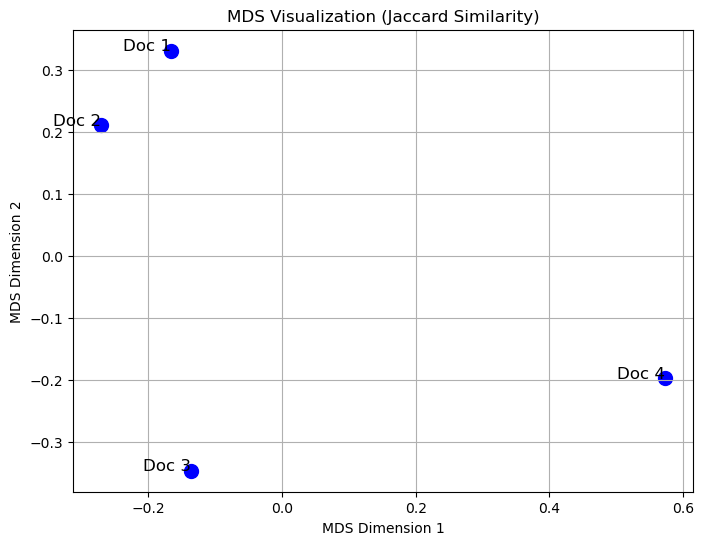

In [28]:
# MDS Visualization
def plot_mds(matrix, title, metric=True):
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric=metric)
    coords = mds.fit_transform(matrix)
    plt.figure(figsize=(8, 6))
    plt.scatter(coords[:, 0], coords[:, 1], c='blue', s=100)
    for i, txt in enumerate([f"Doc {i+1}" for i in range(num_docs)]):
        plt.annotate(txt, (coords[i, 0], coords[i, 1]), fontsize=12, ha='right')
    plt.title(title)
    plt.xlabel("MDS Dimension 1")
    plt.ylabel("MDS Dimension 2")
    plt.grid(True)
    plt.show()

# Plot MDS for Cosine Similarity (convert similarity to distance: 1 - similarity)
cosine_dist_matrix = 1 - cosine_sim_matrix
plot_mds(cosine_dist_matrix, "MDS Visualization (Cosine Similarity)")

# Plot MDS for Euclidean Distance
plot_mds(euclidean_dist_matrix, "MDS Visualization (Euclidean Distance)")

# Plot MDS for Jaccard Similarity (convert similarity to distance: 1 - similarity)
jaccard_dist_matrix = 1 - jaccard_sim_matrix
plot_mds(jaccard_dist_matrix, "MDS Visualization (Jaccard Similarity)")